In [10]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt 
import scipy.misc
import cv2
import copy
import time
import random

# data path 
depth_data_path = "/mnt/data/jarvislam1999/data/subject09_depth/rgb/"
foreground_data_path = "/mnt/data/jarvislam1999/data/subject09_nobg/rgb/"
clothes_data_path = "/mnt/data/jarvislam1999/data/clothes/"

# store path
added_fg_data_path = "/mnt/data/jarvislam1999/data/tmp/"

In [15]:
# get all subdirectories that contain images (frames)
#background_data_subdirt = os.listdir(background_data_path)
depth_data_subdirt = [r[0] for r in os.walk(depth_data_path)]
foreground_data_subdirt = [r[0] for r in os.walk(foreground_data_path)]
depth_data_subdirt.sort()
foreground_data_subdirt.sort()

foreground_data_subdirt = foreground_data_subdirt[1:]
fg_frames = os.listdir(foreground_data_subdirt[0])
fg_frames.sort()
depth_data_subdirt = foreground_data_subdirt[0].replace(foreground_data_path + '/', depth_data_path)
depth_frames = depth_data_subdirt + '/' + fg_frames[0]

clothes_data_file = os.listdir(clothes_data_path)
clothes_data_file.sort()

In [16]:
foreground_data_subdirt[0].replace(foreground_data_path, depth_data_path)

'/mnt/data/jarvislam1999/data/subject09_depth/rgb/quick_pronation_01_all'

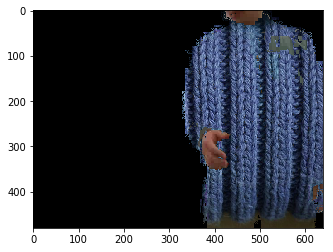

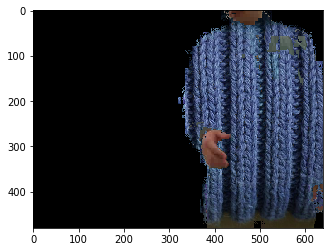

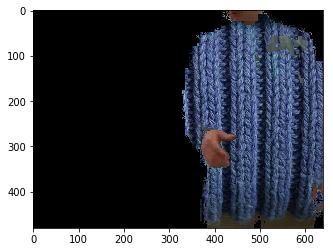

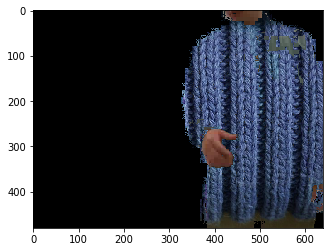

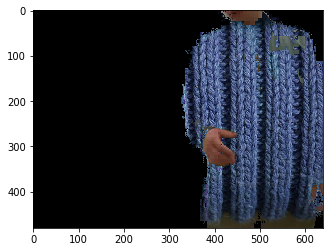

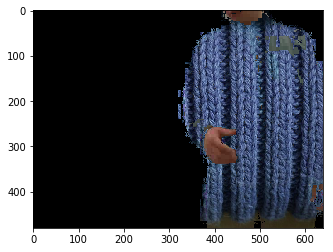

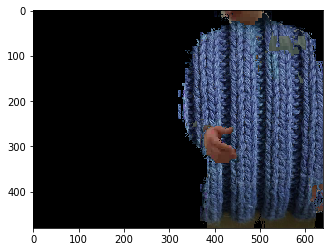

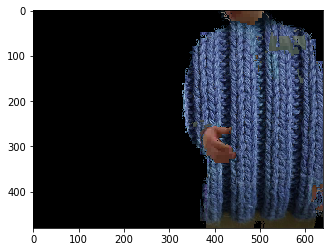

Going through shade removal


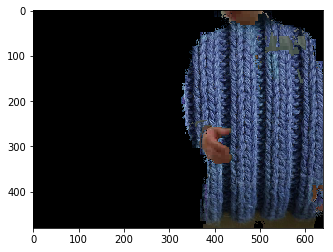

Going through shade removal


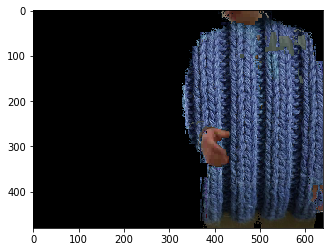

Going through shade removal


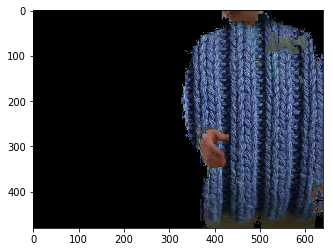

create new dir: /mnt/data/jarvislam1999/data/tmp/subject09_fg_mask/rgb/quick_pronation_02_all
Going through shade removal


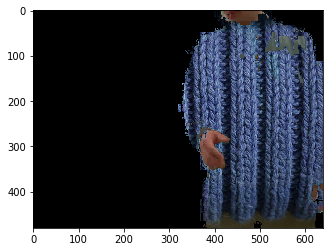

Going through shade removal


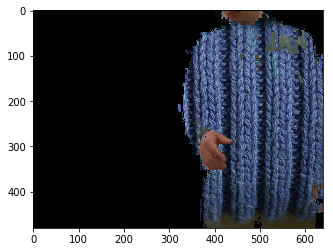

Going through shade removal


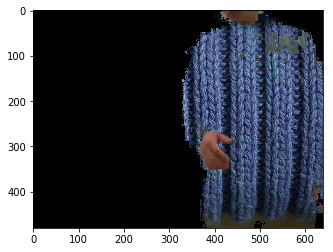

Going through shade removal


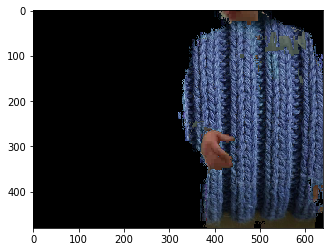

Going through shade removal


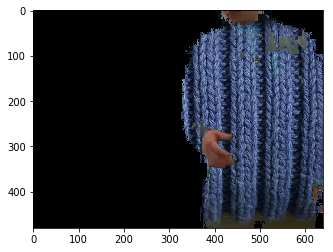

KeyboardInterrupt: 

In [17]:
for clothes_file in clothes_data_file:
    iter_fg = 0
    for subdirt_fg in foreground_data_subdirt:
        #if (iter_fg == 2):
        #    break
        #iter_fg += 1
        #print(subdirt_fg)
        #if (iter_fg <= 235):
        #    iter_fg += 1
        #    continue
        iter_fg += 1
        subdirt_depth = subdirt_fg.replace(foreground_data_path, depth_data_path)
        #print(subdirt_depth)
        if not os.path.isdir(subdirt_depth):
            #print('Wop')
            continue
        
        fg_frames = os.listdir(subdirt_fg)
        fg_frames.sort()
        #print(fg_frames)
        
        
        # loop through each frame in a gesture
        for frame in fg_frames:
            # load the pixels of an foreground image (a frame)
            fg_path = subdirt_fg+'/'+frame
        
            fg_img = Image.open(fg_path, 'r')
            pixels_of_fg_img = np.array(fg_img.getdata())
            pixels_of_fg_img = np.reshape(pixels_of_fg_img, (480, 640, 3))
            #plt.imshow(pixels_of_fg_img, interpolation="none")
            #plt.show()
            #print('OK')
            # load the pixels of a depth image ( a frame)
            depth_path = subdirt_depth + '/' + frame
            #print(depth_path)
            if not os.path.isfile(depth_path):
                #print(depth_path)
                continue
            
            depth_img = Image.open(depth_path, 'r')
            pixels_of_depth_img = np.array(depth_img.getdata())
            pixels_of_depth_img = np.reshape(pixels_of_depth_img, (480, 640, 3))
            #plt.imshow(pixels_of_depth_img, interpolation="none")
            #plt.show()
            
            name = "subject09_fg"
            if (os.path.isfile(added_fg_data_path+name+'_mask'+'/rgb/'+fg_path.replace(foreground_data_path, "")+'.npy')):
                temp_matrix_1 = np.load(added_fg_data_path+name+'_mask'+'/rgb/'+fg_path.replace(foreground_data_path, "")+'.npy')
                temp_matrix_2 = np.logical_not(temp_matrix_1)
            else:
                print('Going through shade removal')
                #temp_matrix_1 = (pixels_of_fg_img==[0, 0, 0])
                temp_matrix_1 = np.greater([140,140,140], pixels_of_depth_img)
                temp_matrix_2 = np.greater(pixels_of_fg_img, [68,0,0])
                temp_matrix_1 = np.logical_and(temp_matrix_1,temp_matrix_2)
                #temp_matrix_1 = np.logical_and([106,106,106], pixels_of_depth_img, np.greater([0,0,0], pixels_of_fg_img))
                #print(temp_matrix_1)
                #temp_matrix_1 = np.logical_and(np.greater([50,50,50], pixels_of_depth_img), \
                #                               pixels_of_fg_img==[0, 0, 0])
            
                # Making all r,g,b channel agree
                temp_matrix_r = np.logical_and(temp_matrix_1[:,:,0], temp_matrix_1[:,:,1])
                temp_matrix_r = np.logical_and(temp_matrix_r, temp_matrix_1[:,:,2])
                temp_matrix_1[:,:,0] = temp_matrix_r
                temp_matrix_1[:,:,1] = temp_matrix_r
                temp_matrix_1[:,:,2] = temp_matrix_r
            
                # Applying shade removal code
                temp_matrix_1 = np.array(temp_matrix_1)
                #temp_matrix_1 = np.logical_not(temp_matrix_1)
                kernel = np.ones((2,2), np.uint8)
                temp_matrix_1 = temp_matrix_1.astype('uint8')
                temp_matrix_1 = cv2.morphologyEx(temp_matrix_1, cv2.MORPH_OPEN, kernel)
                temp_matrix_2 = np.logical_not(temp_matrix_1)
            
            pixels_of_clothes_img = copy.deepcopy(pixels_of_fg_img)
            # Taking out background
            pixels_of_depth_img = pixels_of_depth_img * temp_matrix_1
            #plt.imshow(pixels_of_depth_img, interpolation="none")
            #plt.show()
            
            
            pixels_of_hand_img = pixels_of_fg_img * temp_matrix_1
            pixels_of_hand_img = np.array(pixels_of_hand_img, dtype = np.uint8)
            #pixels_of_fg_img = cv2.GaussianBlur(pixels_of_fg_img, (5,5), 0)
            #plt.imshow(pixels_of_fg_img, interpolation="none")
            #plt.show()
            
            # Taking out hand
            pixels_of_clothes_img = pixels_of_clothes_img * temp_matrix_2
            pixels_of_clothes_img = np.array(pixels_of_clothes_img, dtype = np.uint8)
            #plt.imshow(pixels_of_clothes_img, interpolation="none")
            #plt.show()
            #print(pixels_of_clothes_img.shape)
            pixels_of_clothes_img_hsv = cv2.cvtColor(pixels_of_clothes_img,cv2.COLOR_RGB2HSV)
            #print(pixels_of_clothes_img_hsv.dtype)
            # print(pixels_of_clothes_img_hsv)
            
            nonzero = pixels_of_clothes_img_hsv != [0,0,0]
            nonzero_r = np.logical_or(nonzero[:,:,0], nonzero[:,:,1])
            nonzero_r = np.logical_or(nonzero_r, nonzero[:,:,2])
            #plt.imshow(nonzero_r, interpolation="none")
            #plt.show()
            #print(nonzero_r[0,0])
            
            clothes = Image.open(clothes_data_path+clothes_file)
            clothes_img = np.array(clothes, dtype = np.uint8)
            clothes_img_hsv = cv2.cvtColor(clothes_img,cv2.COLOR_RGB2HSV)
            
            #pixels_of_clothes_img_hsv1 = [[min(0,180) if y else x for x,y in zip(m,n)] \
            #                              for m,n in zip(pixels_of_clothes_img_hsv[:,:,0], nonzero_r)]
            #pixels_of_clothes_img_hsv1 = min(0, 255)* nonzero_r
            #pixels_of_clothes_img_hsv1 = np.random.randint(0, 10, nonzero_r.shape) * nonzero_r
            #pixels_of_clothes_img_hsv1 = np.random.normal(loc=100.0, scale=10.0, size=nonzero_r.shape) * nonzero_r
            pixels_of_clothes_img_hsv1 = (pixels_of_clothes_img_hsv[:,:,0]/10 + clothes_img_hsv[:,:,0]) * nonzero_r
            
            pixels_of_clothes_img_hsv1 = np.array(pixels_of_clothes_img_hsv1, dtype = np.uint8)
            #print(pixels_of_clothes_img_hsv1.shape)
            pixels_of_clothes_img_hsv[:,:,0] = pixels_of_clothes_img_hsv1
            
            #pixels_of_clothes_img_hsv2 = [[min(x+40, 255) if y else x for x,y in zip(m,n)] \
            #                              for m,n in zip(pixels_of_clothes_img_hsv[:,:,1], nonzero_r)]
            #pixels_of_clothes_img_hsv2 = pixels_of_clothes_img_hsv[:,:,1] + min(40, 255)* nonzero_r
            #pixels_of_clothes_img_hsv2 = np.random.randint(250, 255, nonzero_r.shape) * nonzero_r
            #pixels_of_clothes_img_hsv2 = np.random.normal(loc=pixels_of_clothes_img_hsv[:,:,1], scale=10.0, size=nonzero_r.shape) * nonzero_r
            pixels_of_clothes_img_hsv2 = (pixels_of_clothes_img_hsv[:,:,1]/10 + clothes_img_hsv[:,:,1]) * nonzero_r
            
            pixels_of_clothes_img_hsv2 = np.array(pixels_of_clothes_img_hsv2, dtype = np.uint8)
            #print(pixels_of_clothes_img_hsv1.shape)
            pixels_of_clothes_img_hsv[:,:,1] = pixels_of_clothes_img_hsv2
            
            #pixels_of_clothes_img_hsv3 = [[min(x+40, 255) if y else x for x,y in zip(m,n)] \
            #                              for m,n in zip(pixels_of_clothes_img_hsv[:,:,2], nonzero_r)]
            #pixels_of_clothes_img_hsv3 = pixels_of_clothes_img_hsv[:,:,2] + min(40, 255)* nonzero_r
            #pixels_of_clothes_img_hsv3 = np.random.randint(250, 255, nonzero_r.shape) * nonzero_r
            #pixels_of_clothes_img_hsv3 = np.random.normal(loc=pixels_of_clothes_img_hsv[:,:,2], scale=10.0, size=nonzero_r.shape) * nonzero_r
            pixels_of_clothes_img_hsv3 = (pixels_of_clothes_img_hsv[:,:,2]/10 + clothes_img_hsv[:,:,2]) * nonzero_r
            
            pixels_of_clothes_img_hsv3 = np.array(pixels_of_clothes_img_hsv3, dtype = np.uint8)
            #print(pixels_of_clothes_img_hsv1.shape)
            pixels_of_clothes_img_hsv[:,:,2] = pixels_of_clothes_img_hsv3
            
            
            pixels_of_clothes_img = cv2.cvtColor(pixels_of_clothes_img_hsv,cv2.COLOR_HSV2RGB)
            #plt.imshow(pixels_of_clothes_img, interpolation="none")
            #plt.show()
            
            pixels_of_fg_img = pixels_of_clothes_img + pixels_of_hand_img
            pixels_of_fg_img = np.array(pixels_of_fg_img, dtype = np.uint8)
            plt.imshow(pixels_of_fg_img, interpolation="none")
            plt.show()
            
            added_fg_img = Image.fromarray(pixels_of_fg_img)
            
            iter_bg = 5
            if not os.path.isdir(added_fg_data_path+name+ (str(iter_bg) if (iter_bg > 9) else '0'+str(iter_bg))):
                print("create new dir: " + added_fg_data_path+name+ (str(iter_bg) if (iter_bg > 9) else '0'+str(iter_bg)))
                os.mkdir(added_fg_data_path+name+ (str(iter_bg) if (iter_bg > 9) else '0'+str(iter_bg)))
                os.mkdir(added_fg_data_path+name+ (str(iter_bg) if (iter_bg > 9) else '0'+str(iter_bg))+'/rgb/')
            if not os.path.isdir(added_fg_data_path+name+ (str(iter_bg) if (iter_bg > 9) else '0'+str(iter_bg))+'/rgb/'+subdirt_fg.replace(foreground_data_path, "")):
                print("create new dir: " + added_fg_data_path+name+ (str(iter_bg) if (iter_bg > 9) else '0'+str(iter_bg))+'/rgb/'+subdirt_fg.replace(foreground_data_path, ""))                 
                os.mkdir(added_fg_data_path+name+ (str(iter_bg) if (iter_bg > 9) else '0'+str(iter_bg))+'/rgb/'+subdirt_fg.replace(foreground_data_path, ""))
            added_fg_img.save(added_fg_data_path+name+ (str(iter_bg) if (iter_bg > 9) else '0'+str(iter_bg))+'/rgb/'+fg_path.replace(foreground_data_path, ""))
            
            if not os.path.isdir(added_fg_data_path+name+'_mask'):
                print("create new dir: " + added_fg_data_path+name+'_mask')
                os.mkdir(added_fg_data_path+name+'_mask')
                os.mkdir(added_fg_data_path+name+'_mask'+'/rgb/')
            if not os.path.isdir(added_fg_data_path+name+'_mask'+'/rgb/'+subdirt_fg.replace(foreground_data_path, "")):
                print("create new dir: " + added_fg_data_path+name+'_mask'+'/rgb/'+subdirt_fg.replace(foreground_data_path, ""))                 
                os.mkdir(added_fg_data_path+name+'_mask'+'/rgb/'+subdirt_fg.replace(foreground_data_path, ""))
            np.save(added_fg_data_path+name+'_mask'+'/rgb/'+fg_path.replace(foreground_data_path, ""), temp_matrix_1)